In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import math

In [34]:
plt.style.use("ggplot")

## MIT-BIH

In [2]:
mitbih = pd.read_csv("mitbih_test.csv", header=None)
mitbih_train = pd.read_csv("mitbih_train.csv", header=None)
#ptbdb_abnormal = pd.read_csv("ptbdb_abnormal.csv", header=None)
#ptbdb_normal = pd.read_csv("ptbdb_normal.csv", header=None)

In [3]:
print(mitbih)

            0         1         2         3         4         5         6    \
0      1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1      0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2      0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3      1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4      0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   
...         ...       ...       ...       ...       ...       ...       ...   
21887  0.928736  0.871264  0.804598  0.742529  0.650575  0.535632  0.394253   
21888  0.802691  0.692078  0.587444  0.446936  0.318386  0.189836  0.118087   
21889  1.000000  0.967359  0.620178  0.347181  0.139466  0.089021  0.103858   
21890  0.984127  0.567460  0.607143  0.583333  0.607143  0.575397  0.575397   
21891  0.973970  0.913232  0.865510  0.823210  0.746204  0.642082  0.547722   

            7         8         9    ...  178  179 

In [4]:
mitbih_train[187]=mitbih_train[187].astype(int)
equilibre=mitbih_train[187].value_counts()
print(equilibre)
print("Ukupno:")
print("U klasi normalnih                      : ", equilibre[0])
print("U klasi supraventrikularnih ektopičnih : ", equilibre[1])
print("U klasi ventrikularnih ektopičnih      : ", equilibre[2])
print("U klasi spojenih                       : ", equilibre[3])
print("U klasi nepoznatih                     : ", equilibre[4])
print(np.sum(equilibre))

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64
Ukupno:
U klasi normalnih                      :  72471
U klasi supraventrikularnih ektopičnih :  2223
U klasi ventrikularnih ektopičnih      :  5788
U klasi spojenih                       :  641
U klasi nepoznatih                     :  6431
87554


In [44]:
mitbih[187]=mitbih[187].astype(int)
equilibre=mitbih[187].value_counts()
print(equilibre)
print("Ukupno:")
print("U klasi normalnih                      : ", equilibre[0])
print("U klasi supraventrikularnih ektopičnih : ", equilibre[1])
print("U klasi ventrikularnih ektopičnih      : ", equilibre[2])
print("U klasi spojenih                       : ", equilibre[3])
print("U klasi nepoznatih                     : ", equilibre[4])
print(np.sum(equilibre))

0    18118
4     1608
2     1448
1      556
3      162
Name: 187, dtype: int64
Ukupno:
U klasi normalnih                      :  18118
U klasi supraventrikularnih ektopičnih :  556
U klasi ventrikularnih ektopičnih      :  1448
U klasi spojenih                       :  162
U klasi nepoznatih                     :  1608
21892


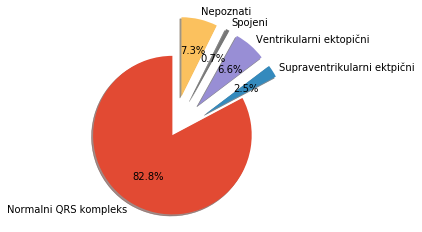

In [47]:
labels = 'Normalni QRS kompleks', 'Supraventrikularni ektpični', 'Ventrikularni ektopični', 'Spojeni', 'Nepoznati'
sizes = [72471, 2223, 5788, 641, 6431]
explode = (0, 0.5, 0.5, 0.5, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

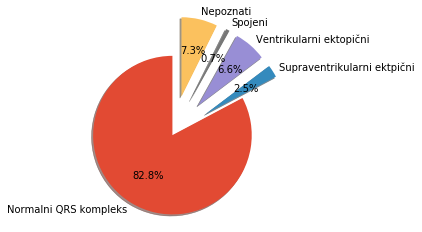

In [51]:
labels = 'Normalni QRS kompleks', 'Supraventrikularni ektpični', 'Ventrikularni ektopični', 'Spojeni', 'Nepoznati'
sizes = [18118, 556, 1448, 162, 1608]
explode = (0, 0.5, 0.5, 0.5, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

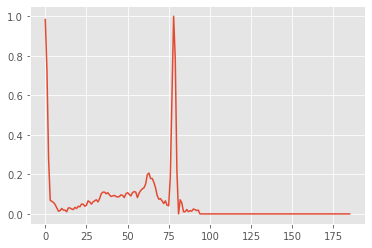

In [35]:
plt.plot(mitbih_train.iloc[200,:186])
plt.show()

In [7]:
df_1=mitbih_train[mitbih_train[187]==1].sample(n=10,random_state=42).iloc[:, :186].values
df_2=mitbih_train[mitbih_train[187]==2].sample(n=10,random_state=42).iloc[:, :186].values
df_3=mitbih_train[mitbih_train[187]==3].sample(n=10,random_state=42).iloc[:, :186].values
df_4=mitbih_train[mitbih_train[187]==4].sample(n=10,random_state=42).iloc[:, :186].values
df_0=(mitbih_train[mitbih_train[187]==0]).sample(n=10,random_state=42).iloc[:, :186].values

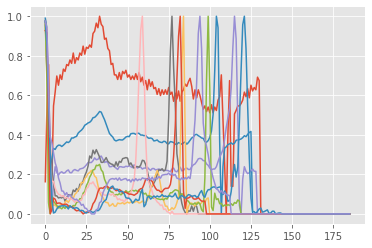

In [36]:
plt.figure()
for i in range(10):
    plt.plot(df_0[i])

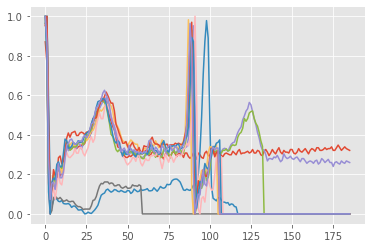

In [37]:
plt.figure()
for i in range(10):
    plt.plot(df_1[i])

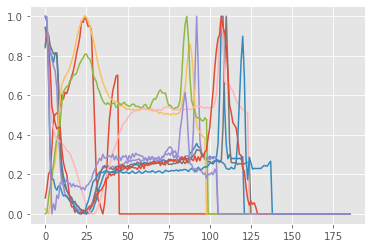

In [38]:
plt.figure()
for i in range(10):
    plt.plot(df_2[i])

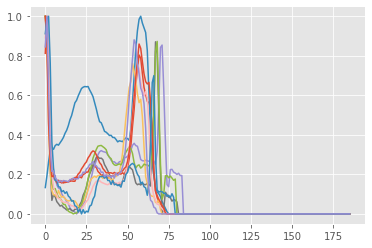

In [39]:
plt.figure()
for i in range(10):
    plt.plot(df_3[i])

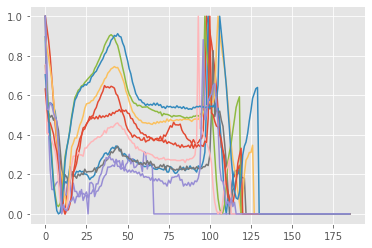

In [40]:
plt.figure()
for i in range(10):
    plt.plot(df_4[i])

## PTB-DB

In [24]:
ptbdb_abnormal = pd.read_csv("ptbdb_abnormal.csv", header=None)
ptbdb_normal = pd.read_csv("ptbdb_normal.csv", header=None)

In [25]:
print(ptbdb_abnormal)
print(ptbdb_normal)

            0         1         2         3         4         5         6    \
0      0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1      1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2      1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3      0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4      0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   
...         ...       ...       ...       ...       ...       ...       ...   
10501  0.981409  1.000000  0.559171  0.287093  0.196639  0.204862  0.215946   
10502  0.906250  0.922379  0.878024  0.810484  0.712702  0.667339  0.608871   
10503  1.000000  0.867971  0.674122  0.470332  0.296987  0.169307  0.077664   
10504  1.000000  0.984672  0.658888  0.556394  0.446809  0.395790  0.315260   
10505  0.997886  0.700317  0.464059  0.318182  0.233615  0.184989  0.124207   

            7         8         9    ...  178  179 

In [20]:
data_ptb = []

data_ptb.extend(ptbdb_normal.iloc[:, :186].values)
data_ptb.extend(ptbdb_abnormal.iloc[:, :186].values)

labels_ptb = []
labels_ptb.extend(ptbdb_normal.iloc[:, 187].values)
labels_ptb.extend(ptbdb_abnormal.iloc[:, 187].values)

data_ptb = np.array(data_ptb)
labels_ptb = np.array(labels_ptb)

In [26]:
df_normal=ptbdb_normal.sample(n=10,random_state=42).iloc[:, :186].values
df_abnormal=ptbdb_abnormal.sample(n=10,random_state=42).iloc[:, :186].values

In [28]:
print("Ukupno:")
print("U klasi normalnih                      : ", len(ptbdb_normal))
print("U klasi abnormalnih                    : ", len(ptbdb_abnormal))


Ukupno:
U klasi normalnih                      :  4046
U klasi abnormalnih                    :  10506


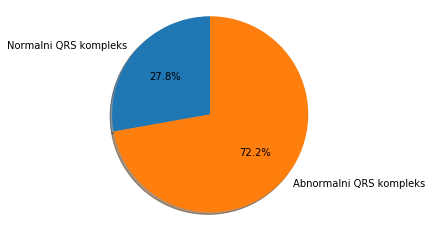

In [29]:
labels = 'Normalni QRS kompleks', 'Abnormalni QRS kompleks'
sizes = [4046, 10506]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

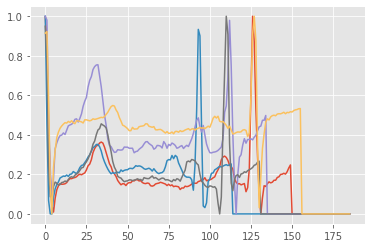

In [41]:
plt.figure()
for i in range(5):
    plt.plot(df_normal[i])

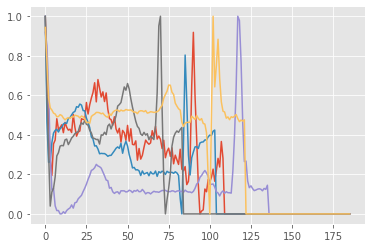

In [42]:
plt.figure()
for i in range(5):
    plt.plot(df_abnormal[i])